In [1]:
library(tidyverse)
library(tidytext)
library(textdata)
library(caret)

# Input data files are available in the read-only "../input/" directory
# For example, running this cell (by clicking ▶️, run or pressing Shift+Enter) will list 
# all files under the "../input/" directory

list.files(path = "../input")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘textdata’


The following object is masked from ‘package:httr’:

    cache_info


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




[1] "afinn-df"                       "bda-2022-personality-profiling"
[3] "distress-lexicontxt"            "empathy-lexicontxt"            
[5] "sentdf"

There are three .csv files in the directory structure:

In [2]:
directory_content = list.files("../input/bda-2022-personality-profiling/youtube-personality", full.names = TRUE)
print(directory_content)

[1] "../input/bda-2022-personality-profiling/youtube-personality/README.txt"                                                 
[2] "../input/bda-2022-personality-profiling/youtube-personality/transcripts"                                                
[3] "../input/bda-2022-personality-profiling/youtube-personality/YouTube-Personality-audiovisual_features.csv"               
[4] "../input/bda-2022-personality-profiling/youtube-personality/YouTube-Personality-gender.csv"                             
[5] "../input/bda-2022-personality-profiling/youtube-personality/YouTube-Personality-Personality_impression_scores_train.csv"


In addition there's a "transcript" folder (see number \[2\] in the output above) in which the actual video transcripts are stored in `.txt` files. 

Store these file paths in variables for easy reference later on:

In [3]:
# Path to the transcripts directory with transcript .txt files
path_to_transcripts = directory_content[2] 

# .csv filenames (see output above)
AudioVisual_file    = directory_content[3]
Gender_file         = directory_content[4]
Personality_file    = directory_content[5]

# 1. Import the data

We'll import

- Transcripts
- Personality scores
- Gender

## 1.1 Importing transcripts

The transcript text files are stored in the subfolder 'transcripts'. They can be listed with the following commands:

In [4]:
transcript_files = list.files(path_to_transcripts, full.names = TRUE) 

print(head(transcript_files))

[1] "../input/bda-2022-personality-profiling/youtube-personality/transcripts/VLOG1.txt"  
[2] "../input/bda-2022-personality-profiling/youtube-personality/transcripts/VLOG10.txt" 
[3] "../input/bda-2022-personality-profiling/youtube-personality/transcripts/VLOG100.txt"
[4] "../input/bda-2022-personality-profiling/youtube-personality/transcripts/VLOG102.txt"
[5] "../input/bda-2022-personality-profiling/youtube-personality/transcripts/VLOG103.txt"
[6] "../input/bda-2022-personality-profiling/youtube-personality/transcripts/VLOG104.txt"


The transcript file names encode the vlogger ID that you will need for joining information from the different data frames. A clean way to extract the vlogger ID's from the names is by using the funcation `basename()` and removing the file extension ".txt".

In [5]:
vlogId = basename(transcript_files)
vlogId = str_replace(vlogId, pattern = ".txt$", replacement = "")
head(vlogId)

[1] "VLOG1"   "VLOG10"  "VLOG100" "VLOG102" "VLOG103" "VLOG104"

To include features extracted from the transcript texts you will have to read the text from files and store them in a data frame. For this, you will need the full file paths as stored in `transcript_files`.

Here are some tips to do that programmatically

- use either a `for` loop, the `sapply()` function, or the `map_chr()` from the `tidyverse`
- don't forget to also store `vlogId` extracted with the code above 

We will use the `map_chr()` function here:

In [6]:
transcripts_df = tibble(
    
    # vlogId connects each transcripts to a vlogger
    vlogId=vlogId,
    
    # Read the transcript text from all file and store as a string
    Text = map_chr(transcript_files, ~ paste(readLines(.x), collapse = "\\n")), 
    
    # `filename` keeps track of the specific video transcript
    filename = transcript_files
)

Warning message in readLines(.x):
“incomplete final line found on '../input/bda-2022-personality-profiling/youtube-personality/transcripts/VLOG11.txt'”


In [7]:
transcripts_df %>% 
    head(2)

vlogId,Text,filename
<chr>,<chr>,<chr>
VLOG1,"You know what I see - - no, more like hear a lot these days, is people calling other people gay as an insult. Now what makes people come up with calling others gay? Now here's an example. Hey, hey, you wanna trade Pokemon or Ziegfield cards? Or, or, or we can play, we can play superheroes. Oh, can I be Optimus Prime? Dude, you are so gay. Dude, the cool kids do crack. Oh, my mommy says, say no to drugs. Okay, how the hell does playing Pokemon cards or -- or --- or dancing or holding hands with another guy make me homosexual? I don't get these people. \nThis is how it is in my school. Okay, here's an example. All right, um, when they see two guys are gay, they're together, they're like no, ew, no. No, no that -- that doesn't go together - - you know, two guys, no. two sticks, no. It just doesn't work like . But when they see two girls, they're like, get it on. And I don't get these people. I've never seen someone say like, oh, you're so homosexual or you're so lesbian or you're such a child molester. It is always the word gay, cause apparently gay is now an insult, even though the word means like happy and lively and that kinda giddy feeling you have inside, like -- -- but no you have to turn that happy word into a mean word. Apparently, we can do that now, turning good things into bad things. It's like how Spiderman felt good, but then that -- that -- that grease that gets all over him and then and then evil Dr. Octopus. That's so gay, you like Spiderman. Lar, I'm going to the movies with the guys to watch Mama Mia. \nYou never know if other people are offended by what you say. I'm not saying you're a bad person if you do it. I used to do it all the time. I'm more focused on why we say it. In the end, we're all the same. You know, there's nothing wrong with it. I was just wondering where it all came from, you know. All right, thanks a lot for watching. Oh, yeah and the club channel is up and running. So, make sure to check that out because there's gonna be a lot of cool stuff on there. We'll do up to like four challenges at a time. We'll do contests, dares, questions. In the end, there's gonna be a lot of viewer interactions, so it's gonna be really fun. We may even put other people on the video too. So check it.",../input/bda-2022-personality-profiling/youtube-personality/transcripts/VLOG1.txt
VLOG10,"Hey everybody, it's Monday, July twenty seventh, two thousand and nine and that means it's time for another edition of XXXX. \nGovernor Palin's back in the news this week as she transitions from Alaska governor to Alaskan citizen. Pending all power to Lieutenant Governor Parnell, she had a few choice words for the Media. \nIt is, as throughout all Alaska, that big wild, good wife teaming along the road that is north to the future. That's what we get to see every day. Now what the rest of America gets to see along with us, is in this last frontier there is hope and opportunity and there is country pride. And it is our man and women in uniform securing it. And we are facing tough challenges in America with some seeming to just be hell bent maybe on tearing down our nation, perpetuating some pessimism and suggesting American apologetics. \nWhat? \nAnd we can resist enslavement to big central government that pressures hope and opportunity. Be wary of accepting government largesse. It doesn't come free and often accepting it takes away everything that is free. Melting into Washington's powerful, caretaking arms will just suck incentive to work hard and charge our own course right out of us. \nUh, wait. Is that -- no way, what? She made a good point there at the end. But sometimes I have to wonder if I'm listening to Sarah Palin or Nicholas Fain . \nIn other news over the weekend I heard the story of Troy Anthony Davis. Do you know who he is? You should. \nMister Davis was sentenced to death for the murder of an off duty Savannah, Georgia police officer named Mark McPhail back in nineteen 

## Import personality scores

The other data files can be read in with `read_delim` (not `read_csv` because the files are not actually comma separated). For instance, the following should work:

In [8]:
# Import the Personality scores
pers_df = read_delim(Personality_file, delim=" ")


Rows: 324 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
chr (1): vlogId
dbl (5): Extr, Agr, Cons, Emot, Open

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Import gender

Gender info is stored in a separate `.csv` which is also delimited with a space. This file doesn't have column names, so we have to add them ourselves:

In [9]:
gender_df = read.delim(Gender_file, head=FALSE, sep=" ", skip = 2)

# Add column names
names(gender_df) = c('vlogId', 'gender')


head(gender_df)

,vlogId,gender
,<chr>,<chr>
1,VLOG3,Female
2,VLOG5,Male
3,VLOG6,Male
4,VLOG7,Male
5,VLOG8,Female
6,VLOG9,Female


## Merging the `gender` and `pers` dataframes

Obviously, we want all the information in a single tidy data frame. While the builtin R function `merge()` can do that, the `tidyverse()` has a number of more versatile and consistent functions called `left_join`, `right_join`, `inner_join`, `outer_join`, and `anti_join`. We'll use `left_join` here to merge the gender and personality data frames:

In [10]:
vlogger_df = left_join(gender_df, pers_df, by='vlogId')
head(vlogger_df) # VLOG8 has missing personality scores: those should be predicted

,vlogId,gender,Extr,Agr,Cons,Emot,Open
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,VLOG3,Female,5.0,5.0,4.6,5.3,4.4
2,VLOG5,Male,5.9,5.3,5.3,5.8,5.5
3,VLOG6,Male,5.4,4.8,4.4,4.8,5.7
4,VLOG7,Male,4.7,5.1,4.4,5.1,4.7
5,VLOG8,Female,NA,NA,NA,NA,NA
6,VLOG9,Female,5.6,5.0,4.0,4.2,4.9


Note that some rows, like row 5, has `NA`'s for the personality scores. This is because this row corresponds to the vlogger with vlogId `VLOG8` is part of the test set. You still have to split `vlogger_df` into the training and test set, as shown below.

We leave the `transcripts_df` data frame seperate for now, because you will first have to extract features from the transcripts first. Once you have those features in a tidy data frame, including a `vlogId` column, you can refer to this `left_join` example to merge your features with `vlogger_df` in one single tidy data frame.

# 2. Feature extraction from transcript texts

Here you will develop the code that extract features from the transcript texts using `tidytext`. Look at [Introducing Text Analytics](https://www.kaggle.com/datasniffer/introducing-text-analytics-personality-from-text) to see how you should do this.

In [11]:
unnest_tokens(transcripts_df, words, Text) %>%
    head()

vlogId,filename,words
<chr>,<chr>,<chr>
VLOG1,../input/bda-2022-personality-profiling/youtube-personality/transcripts/VLOG1.txt,you
VLOG1,../input/bda-2022-personality-profiling/youtube-personality/transcripts/VLOG1.txt,know
VLOG1,../input/bda-2022-personality-profiling/youtube-personality/transcripts/VLOG1.txt,what
VLOG1,../input/bda-2022-personality-profiling/youtube-personality/transcripts/VLOG1.txt,i
VLOG1,../input/bda-2022-personality-profiling/youtube-personality/transcripts/VLOG1.txt,see
VLOG1,../input/bda-2022-personality-profiling/youtube-personality/transcripts/VLOG1.txt,no


## Feature Extraction

### word count
this can be used to extract mean scores

In [12]:
# compute num words per piece of text used to compute word frequency 
transcripts_df$count = str_count(transcripts_df$Text,'\\w+')
head(transcripts_df)

vlogId 
1 VLOG1  
2 VLOG10 
3 VLOG100
4 VLOG102
5 VLOG103
6 VLOG104
  Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

### 'Afinn' Sentiment analysis
This Sentiment analysis is used because the dictionary contains slang words which are present in the data.

In [13]:
transcripts_df %>%
  unnest_tokens(word, Text) -> word_df

sent_dic <- read.delim("../input/afinn-df/AFINN-111.txt", col.names = c("word", "value")) # loading in the afinn dictionary

word_df %>%
  inner_join(sent_dic) -> word_df

word_df %>% 
  mutate(vlogId = as.factor(vlogId)) %>% 
  group_by(vlogId) %>% #following computations will be done per person
  summarise(sent = mean(value)) -> sent_afinn

afinn_df = transcripts_df %>%
    inner_join(sent_afinn, by = "vlogId") %>%
    mutate(mean_sent = sent / count) %>%
    select(c(-Text, -filename, -count))

head(afinn_df)


Joining, by = "word"


vlogId,sent,mean_sent
<chr>,<dbl>,<dbl>
VLOG1,0.3500000,0.0007592191
VLOG10,0.2413793,0.0005258809
VLOG100,1.2857143,0.0042154567
VLOG102,1.3235294,0.0009134088
VLOG103,0.5263158,0.0006379585
VLOG104,2.0000000,0.0024301337


### NRC sentiment analysis

This sentiment analysis is added because where afinn only recognizes positive and negative words this one categorizes what kind of sentiment is being used (ie. trust, suprise, disgust).

In [14]:
# Feature extraction - Keyword counts with nrc
## load nrc 
load_nrc = function() {
    if (!file.exists('nrc.txt'))
        download.file("https://www.dropbox.com/s/yo5o476zk8j5ujg/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt?dl=1","nrc.txt")
    nrc = read.table("nrc.txt", col.names=c('word','sentiment','applies'), stringsAsFactors = FALSE)
    nrc %>% filter(applies==1) %>% select(-applies)
}
nrc = load_nrc()   

## clean data and comput sentiment scores
transcripts_sentiment_scores <- transcripts_df %>%
    unnest_tokens(token, Text, token = 'words') %>% 
    anti_join(get_stopwords(), by = c(token = 'word')) %>%
    inner_join(nrc, by = c(token = 'word')) %>%
    count(`vlogId`, `sentiment`)

nrc_df = 
    transcripts_sentiment_scores %>%
    spread(sentiment, n, fill = 0)

head(nrc_df)

vlogId,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
VLOG1,8,10,8,6,7,10,14,8,5,11
VLOG10,10,19,7,14,9,18,19,8,10,17
VLOG100,0,9,0,2,8,3,11,1,2,9
VLOG102,4,50,7,14,29,14,42,8,22,24
VLOG103,0,19,4,9,13,15,26,10,5,11
VLOG104,2,15,0,4,49,3,62,22,9,37


### Word frequency counts

Frequency of self referencing

[1] 402   8

integer(0)


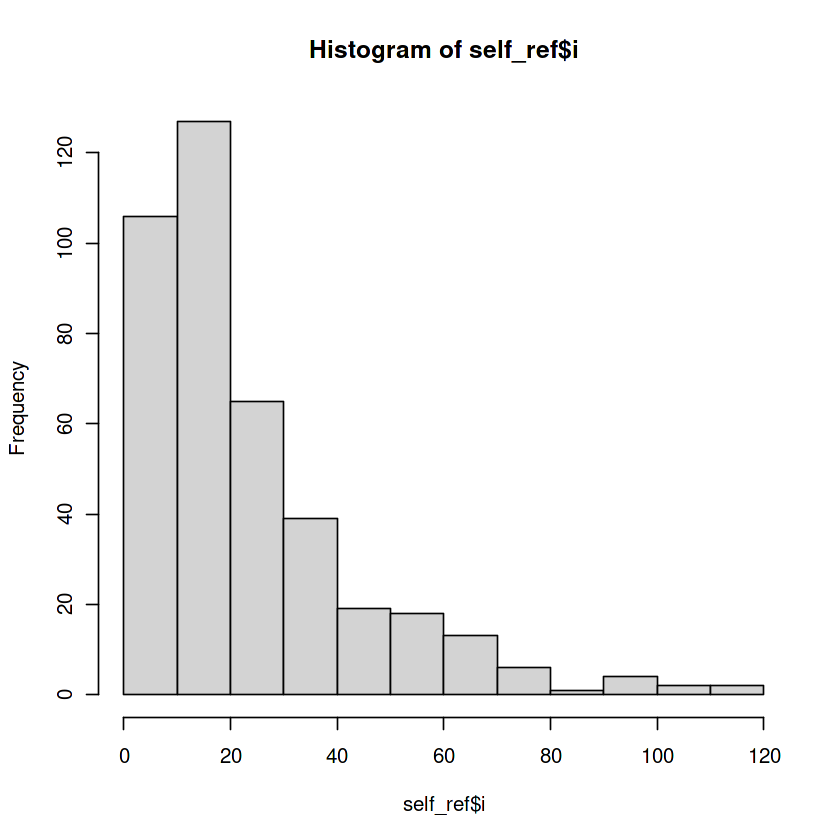

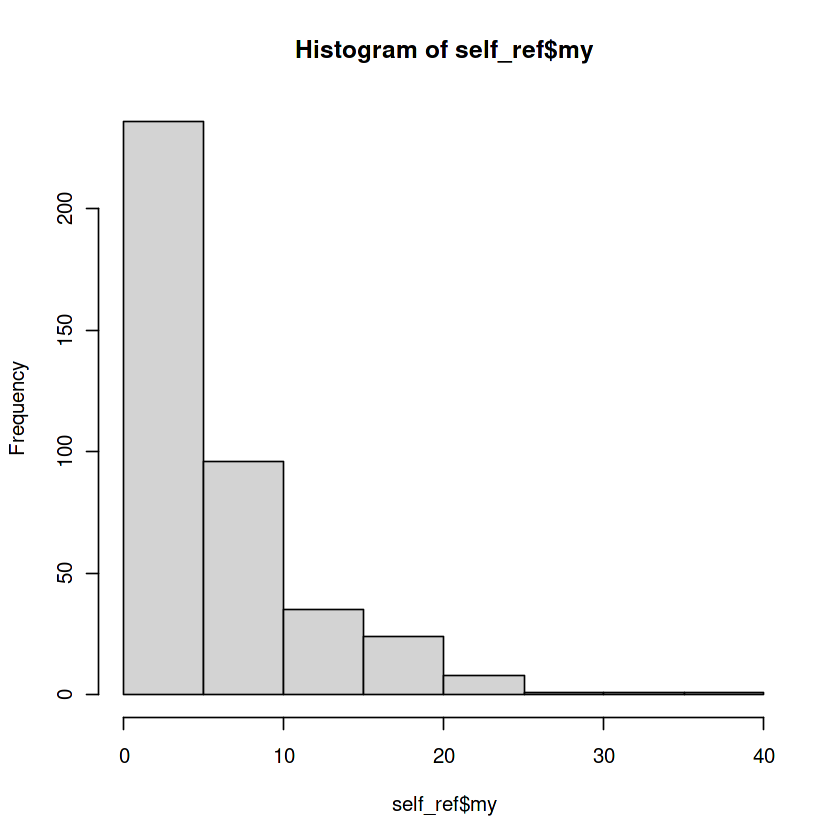

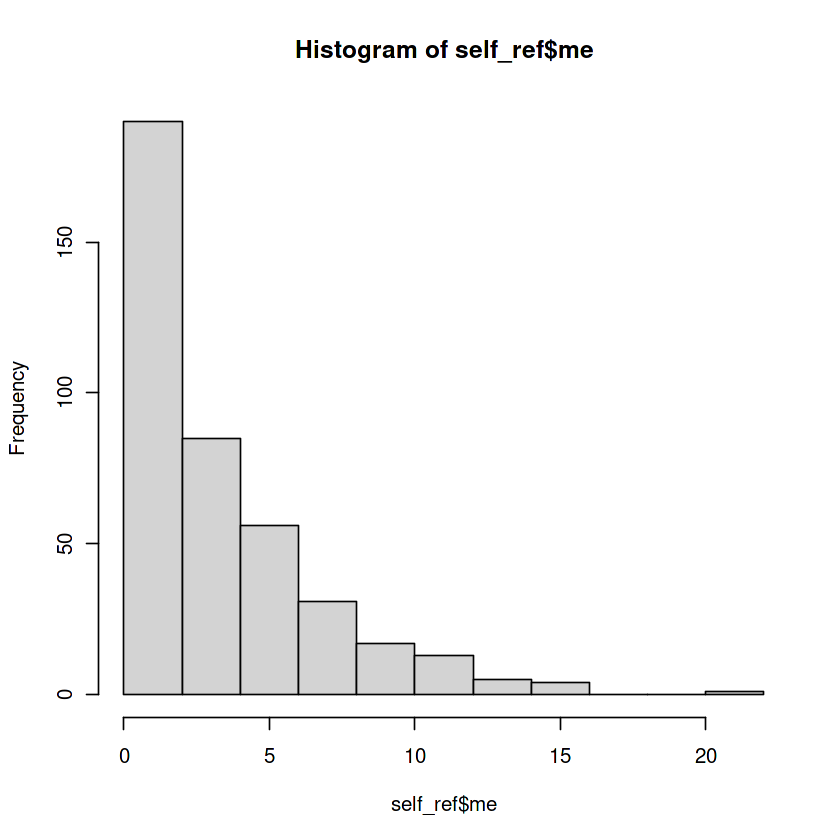

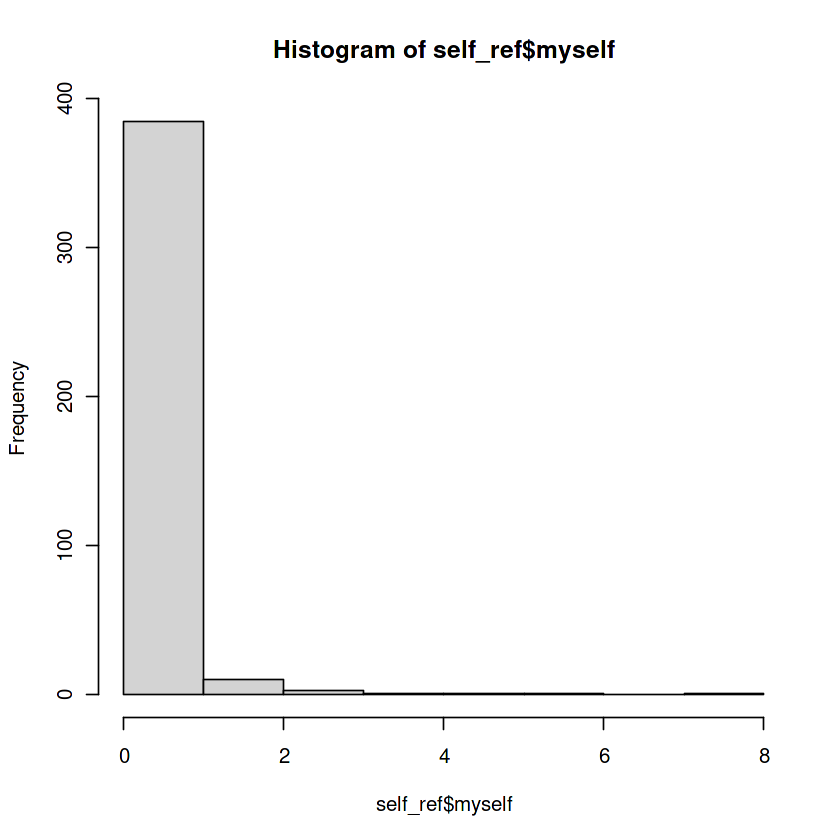

In [15]:
txt_tokenized = 
    transcripts_df %>%
    unnest_tokens(word, Text, token = 'words')

word_counts = 
    txt_tokenized %>%
    count(vlogId, word)

self_ref = word_counts[word_counts$word %in% c('i', 'my', 'me', 'myself', 'mine', 'self' ), ]
self_ref = self_ref %>%
    pivot_wider(names_from=word, values_from=n) %>%
    replace_na(list(i=0, me=0, my=0, myself=0)) %>%
    mutate(self_sum=i+me+my+myself)

dim(self_ref)  # the dimension is reduced probably cuz those observations did not say any of these words 
print(caret::nearZeroVar(self_ref))

hist(self_ref$i)
hist(self_ref$my)
hist(self_ref$me)
hist(self_ref$myself)
self_ref %>%
  select(c(vlogId, self_sum)) -> self_df

Frequency of expressing social nouns

[1] 402  22

vlogId,him,other,others,people,they,we,you,he,she,⋯,her,friends,them,group,team,community,groups,teams,communities,soc_sum
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
VLOG1,1,3,1,7,2,5,11,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,30
VLOG10,NA,2,NA,NA,2,3,4,1,3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,17
VLOG100,1,NA,NA,NA,NA,NA,NA,8,NA,⋯,3,NA,NA,NA,NA,NA,NA,NA,NA,13
VLOG102,1,3,NA,5,8,6,19,1,2,⋯,5,1,6,NA,NA,NA,NA,NA,NA,58
VLOG103,NA,1,NA,NA,2,NA,7,NA,1,⋯,1,NA,1,NA,NA,NA,NA,NA,NA,13
VLOG104,NA,NA,NA,NA,2,NA,14,NA,NA,⋯,NA,NA,1,NA,NA,NA,NA,NA,NA,17


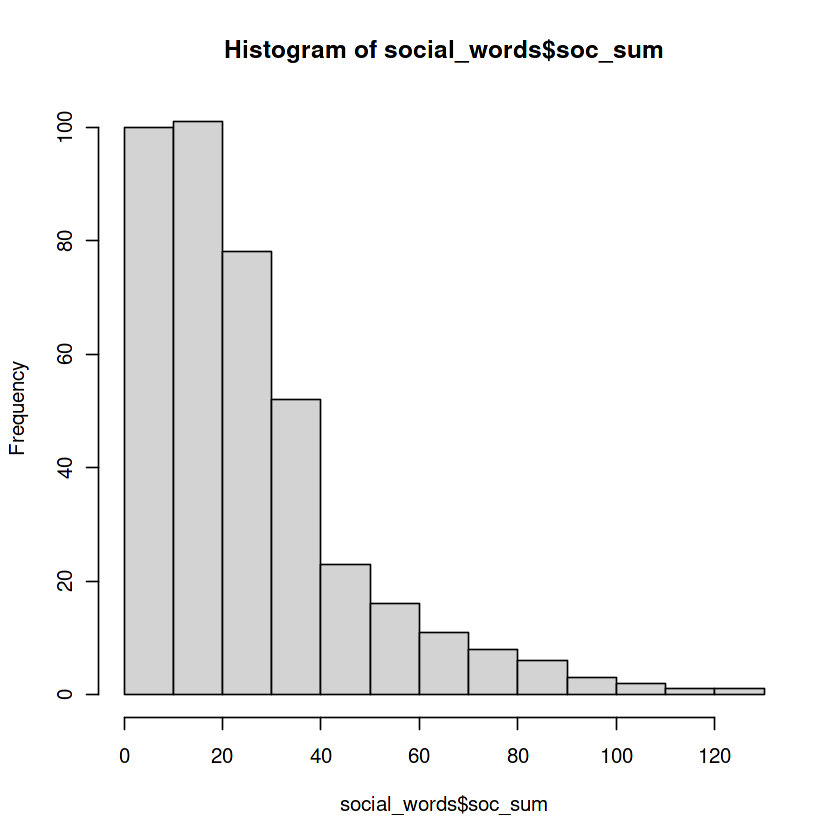

In [16]:
social_words = word_counts[word_counts$word %in% c('you', 'he', 'she', 'they', 'others', 'friend', 'friends', 
                                                   'community', 'group', 'team', 'we', 'us', 'him', 'her', 'them', 
                                                   'other', 'communities', 'groups', 'teams', 'people'), ]
social_words = social_words %>%
    pivot_wider(names_from=word, values_from=n) 

social_words$soc_sum = rowSums(social_words[, -1], na.rm=TRUE)

dim(social_words)  # the dimension is reduced probably because those observations did not say any of these words 
head(social_words)

hist(social_words$soc_sum)
social_words %>%
  select(c(vlogId, soc_sum))-> soc_df

Frequency of expressing uncertainty

In [17]:
uncertainty = word_counts[word_counts$word %in% c('maybe', 'guess', 'probably', 'perhaps', 'possibly', 'apparently',
                                                  'suppose', 'doubt', 'hesitate'), ]
uncertainty = uncertainty %>%
    pivot_wider(names_from=word, values_from=n) 
uncertainty$unc_sum = rowSums(uncertainty[, -1], na.rm=TRUE)
uncertainty %>%
  select(c(vlogId, unc_sum)) -> unc_df
head(unc_df)

vlogId,unc_sum
<chr>,<dbl>
VLOG1,2
VLOG10,1
VLOG102,5
VLOG103,3
VLOG104,2
VLOG105,1


## 6. Empathy and distress scores 
inspired by https://www.kaggle.com/code/georgiwhiteley/comp-1-group-11/data?select=distress_lexicon.txt 

In [18]:
empathy_data = read.table("../input/empathy-lexicontxt/empathy_lexicon.txt", header = TRUE, sep = ',')
distress_data = read.table("../input/distress-lexicontxt/distress_lexicon.txt", header = TRUE, sep = ',')

head(empathy_data)
head(distress_data)

# empathy score 
empathy = inner_join(txt_tokenized, empathy_data, by = 'word') 
empa_df = empathy %>%
    group_by(vlogId) %>%
    summarise(emp=mean(rating))

# distress score 
distress = inner_join(txt_tokenized, distress_data, by = 'word') 
distr_df = distress %>%
    group_by(vlogId) %>%
    summarise(dis=mean(rating))

head(empa_df)
head(distr_df)

,word,rating
,<chr>,<dbl>
1,helps,4.315954
2,uncommon,2.534964
3,blank,3.559863
4,iraqis,5.446981
5,explored,4.401998
6,concentrate,3.637599


,word,rating
,<chr>,<dbl>
1,helps,2.409573
2,uncommon,1.303017
3,blank,3.729931
4,iraqis,5.585402
5,explored,3.672773
6,concentrate,2.681559


vlogId,emp
<chr>,<dbl>
VLOG1,3.060428
VLOG10,3.261867
VLOG100,3.332329
VLOG102,3.123552
VLOG103,3.130718
VLOG104,3.166712


vlogId,dis
<chr>,<dbl>
VLOG1,2.920563
VLOG10,3.135499
VLOG100,2.980318
VLOG102,2.980737
VLOG103,2.970042
VLOG104,2.914677


Lexical sophistication 
(number of unique words in text)

vlogId,count
<chr>,<int>
VLOG1,131
VLOG10,199
VLOG100,89
VLOG102,320
VLOG103,195
VLOG104,225


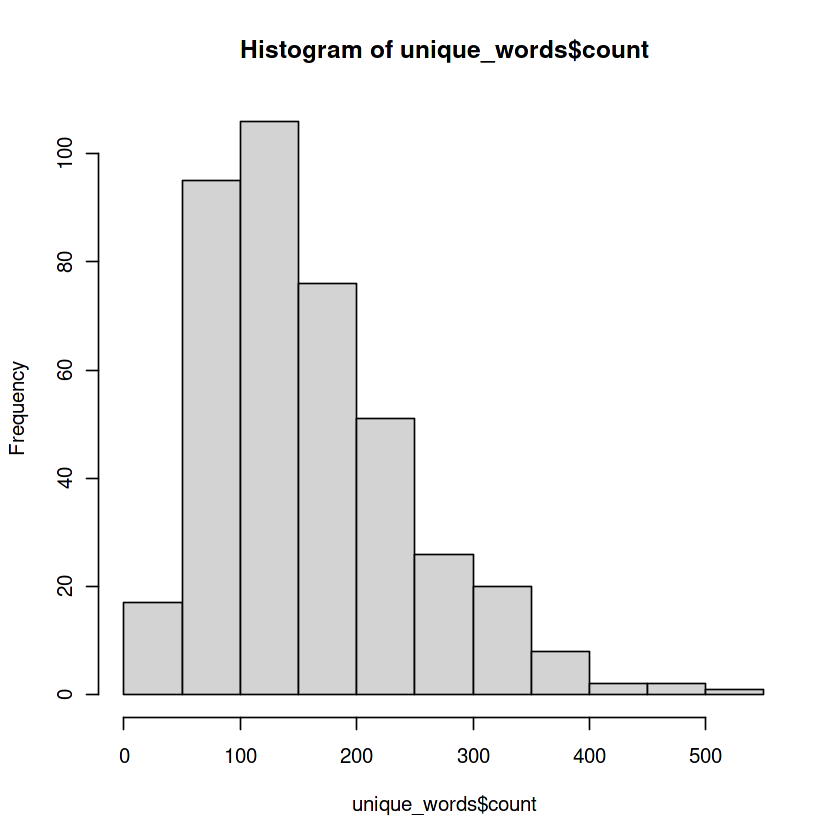

In [19]:
stopwords = get_stopwords() 
# remove stopwords
txt_tokenized_stopremoved = 
    txt_tokenized %>%
    anti_join(stopwords, by = 'word') 

# count unique words 
unique_words <- txt_tokenized_stopremoved %>%                              # Applying group_by & summarise
  group_by(vlogId) %>%
  summarise(count = n_distinct(word))

head(unique_words)
hist(unique_words$count)
colnames(unique_words)[2] <- "unique"

### Ngram analysis

In [20]:
# get bigrams 
bigrams_df = transcripts_df %>%
    unnest_tokens(bigram, Text, token = "ngrams", n = 2)

# filter out stop words
bigrams_separated <- bigrams_df %>%
    separate(bigram, c("word1", "word2"), sep = " ")

bigrams_filtered <- bigrams_separated %>%
    filter(!word1 %in% stopwords$word) %>%
    filter(!word2 %in% stopwords$word)

head(bigrams_filtered)

# new bigram counts:
bigram_counts <- bigrams_filtered %>% 
    group_by(vlogId) %>%
    count(word1, word2)

head(bigram_counts,20)

vlogId,filename,count,word1,word2
<chr>,<chr>,<int>,<chr>,<chr>
VLOG1,../input/bda-2022-personality-profiling/youtube-personality/transcripts/VLOG1.txt,461,like,hear
VLOG1,../input/bda-2022-personality-profiling/youtube-personality/transcripts/VLOG1.txt,461,people,calling
VLOG1,../input/bda-2022-personality-profiling/youtube-personality/transcripts/VLOG1.txt,461,people,gay
VLOG1,../input/bda-2022-personality-profiling/youtube-personality/transcripts/VLOG1.txt,461,insult,now
VLOG1,../input/bda-2022-personality-profiling/youtube-personality/transcripts/VLOG1.txt,461,makes,people
VLOG1,../input/bda-2022-personality-profiling/youtube-personality/transcripts/VLOG1.txt,461,people,come


vlogId,word1,word2,n
<chr>,<chr>,<chr>,<int>
VLOG1,another,guy,1
VLOG1,apparently,gay,1
VLOG1,bad,person,1
VLOG1,bad,things,1
VLOG1,calling,others,1
VLOG1,can,play,2
VLOG1,cause,apparently,1
VLOG1,child,molester,1
VLOG1,club,channel,1


## Use of profanity
"borrowed" from team 02: https://www.kaggle.com/code/jessblanco/team-bigfive-02-personality-competition-2-63d077/notebook?scriptVersionId=105974968

In [21]:
profane = read.csv('https://www.cs.cmu.edu/~biglou/resources/bad-words.txt', header = TRUE)
colnames(profane) <- 'word'
profane_df <- word_df %>%
    inner_join(profane,'word') %>%
    group_by(vlogId) %>%
    summarise(n_prof = n()) %>%
    ungroup()
head(profane_df)

vlogId,n_prof
<chr>,<int>
VLOG1,1
VLOG10,6
VLOG100,2
VLOG102,5
VLOG103,3
VLOG106,3


Once you have computed features from the transcript texts and stored it in a data frame, merge it with the `vlogger_df` dataframe:

### Audio-Visual features

from the audio features we decided to use time.speaking which indicates how much of the video the person was talking as well as the mean.pitch and the standard deviation of the pitch which may indicate something about emotional state and emotional stability.

We also used the energy data which ought to be a indicator of vloggers excitement and kinetic expressiveness which is based on an algorithm that tries to determine how much the vloggers moves.


In [22]:
audiovisual_df <- read.delim(AudioVisual_file, head = TRUE, sep = " ")
audiovisual_df %>%
    head()

,vlogId,mean.pitch,sd.pitch,mean.conf.pitch,sd.conf.pitch,mean.spec.entropy,sd.spec.entropy,mean.val.apeak,sd.val.apeak,mean.loc.apeak,⋯,sd.d.energy,avg.voiced.seg,avg.len.seg,time.speaking,voice.rate,num.turns,hogv.entropy,hogv.median,hogv.cogR,hogv.cogC
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,VLOG1,178.15,0.38358,1.2526,0.45440,3.3674,0.29309,0.82192,0.12429,0.018525,⋯,0.0255970,0.18441,1.35590,0.60796,0.051389,0.44839,7.026606,0.147870,121,198
2,VLOG3,239.32,0.36474,1.2205,0.41543,3.8150,0.17479,0.64969,0.22731,0.027022,⋯,0.0012289,0.16404,1.02720,0.51374,0.057632,0.50013,4.006787,0.008571,175,164
3,VLOG5,173.50,0.47636,1.1678,0.50508,3.6949,0.32347,0.65878,0.22253,0.021466,⋯,0.0026112,0.30966,2.21640,0.70205,0.037614,0.31675,7.016616,0.574790,117,156
4,VLOG6,201.28,0.27454,1.4996,0.40633,3.8767,0.22874,0.67715,0.17994,0.029500,⋯,0.0148060,0.19399,2.53510,0.75993,0.048036,0.29976,3.465855,0.008744,108,179
5,VLOG7,275.68,0.48758,1.0312,0.42298,3.6332,0.52273,0.45095,0.28455,0.017109,⋯,0.0432300,0.56000,1.72040,0.60069,0.024801,0.34916,7.160260,0.285714,135,156
6,VLOG8,255.58,0.42310,1.1554,0.39079,3.7590,0.27783,0.73244,0.16578,0.021644,⋯,0.0158740,0.16954,0.84412,0.46439,0.056864,0.55015,7.612877,0.418219,123,178


In [23]:
audiovisual_df %>%
    select(vlogId, time.speaking, mean.pitch,mean.conf.pitch ,sd.pitch, sd.d.energy, mean.energy, hogv.entropy, hogv.cogR,
          hogv.median, voice.rate) -> audio_df

head(audio_df)

,vlogId,time.speaking,mean.pitch,mean.conf.pitch,sd.pitch,sd.d.energy,mean.energy,hogv.entropy,hogv.cogR,hogv.median,voice.rate
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,VLOG1,0.60796,178.15,1.2526,0.38358,0.0255970,0.0614490,7.026606,121,0.147870,0.051389
2,VLOG3,0.51374,239.32,1.2205,0.36474,0.0012289,0.0021029,4.006787,175,0.008571,0.057632
3,VLOG5,0.70205,173.50,1.1678,0.47636,0.0026112,0.0031128,7.016616,117,0.574790,0.037614
4,VLOG6,0.75993,201.28,1.4996,0.27454,0.0148060,0.0321370,3.465855,108,0.008744,0.048036
5,VLOG7,0.60069,275.68,1.0312,0.48758,0.0432300,0.1286000,7.160260,135,0.285714,0.024801
6,VLOG8,0.46439,255.58,1.1554,0.42310,0.0158740,0.0320580,7.612877,123,0.418219,0.056864


In [24]:
features_df = vlogger_df %>%
    left_join(transcripts_df, by = 'vlogId') %>%
        select(-Text, -filename) %>%
    left_join(afinn_df, by = 'vlogId') %>%
    left_join(nrc_df, by = 'vlogId') %>%
    left_join(unique_words, by= 'vlogId')%>%
    left_join(self_df, by= 'vlogId')%>%
    left_join(soc_df, by= 'vlogId')%>%
    left_join(unc_df, by= 'vlogId') %>%
    left_join(audio_df, by= 'vlogId') %>%
    left_join(profane_df, by = 'vlogId') %>%
    left_join(empa_df, by = 'vlogId') %>%
    left_join(distr_df, by = 'vlogId') %>%
    replace_na(list(emp = 0, dis = 0, soc_sum = 0, unc_sum = 0, n_prof = 0, self_sum = 0)) %>%  # removing all NA's
        mutate(self_mean = self_sum / count) %>% #We decided to calculate all the mean scores here so we didn't have to recalculate word count 
        mutate(soc_mean = soc_sum / count) %>%
        mutate(unc_mean = unc_sum / count) %>%
        mutate(prof_mean = n_prof / count) %>%
        mutate(dis_mean = dis / count) %>% #this one and the next one yielded worse R^2 than taking the emp or the dis score so it wasn't used
        mutate(emp_mean = emp / count) %>%
        mutate(disg_mean = disgust / count) %>% 
        mutate(anger_mean = anger / count) %>%
        mutate(fear_mean = fear / count) %>%
        mutate(joy_mean = joy / count ) %>%
        mutate(neg_mean = negative / count) %>%
        mutate(pos_mean = positive / count) %>% #this one and the next one yielded worse R^2 than taking the emp or the dis score so it wasn't used
        mutate(sad_mean = sadness / count) %>%
        mutate(trust_mean = trust / count ) %>%
        mutate(unique_mean = unique / count ) 

head(features_df,10)

,vlogId,gender,Extr,Agr,Cons,Emot,Open,count,sent,mean_sent,⋯,emp_mean,disg_mean,anger_mean,fear_mean,joy_mean,neg_mean,pos_mean,sad_mean,trust_mean,unique_mean
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,VLOG3,Female,5.0,5.0,4.6,5.3,4.4,390,2.4666667,0.0063247863,⋯,0.008263769,0.005128205,0.002564103,0.005128205,0.017948718,0.005128205,0.02564103,0.010256410,0.02307692,0.3487179
2,VLOG5,Male,5.9,5.3,5.3,5.8,5.5,414,1.7692308,0.0042735043,⋯,0.007666814,0.002415459,0.002415459,0.004830918,0.009661836,0.002415459,0.02415459,0.002415459,0.01207729,0.2946860
3,VLOG6,Male,5.4,4.8,4.4,4.8,5.7,635,1.3000000,0.0020472441,⋯,0.004907246,0.006299213,0.007874016,0.006299213,0.029921260,0.018897638,0.04566929,0.004724409,0.03779528,0.3055118
4,VLOG7,Male,4.7,5.1,4.4,5.1,4.7,674,0.8750000,0.0012982196,⋯,0.004650909,0.016320475,0.017804154,0.010385757,0.017804154,0.022255193,0.03115727,0.016320475,0.02373887,0.3011869
5,VLOG8,Female,NA,NA,NA,NA,NA,331,1.1666667,0.0035246727,⋯,0.009544136,0.006042296,0.009063444,0.018126888,0.021148036,0.015105740,0.03625378,0.012084592,0.02719033,0.3202417
6,VLOG9,Female,5.6,5.0,4.0,4.2,4.9,902,0.4625000,0.0005127494,⋯,0.003513954,0.008869180,0.009977827,0.008869180,0.016629712,0.019955654,0.03325942,0.005543237,0.02328160,0.2738359
7,VLOG10,Male,5.4,4.2,5.6,4.6,4.2,459,0.2413793,0.0005258809,⋯,0.007106463,0.015250545,0.021786492,0.030501089,0.019607843,0.039215686,0.04139434,0.017429194,0.03703704,0.4335512
8,VLOG11,Male,2.9,4.2,5.2,5.1,4.1,976,1.2142857,0.0012441452,⋯,0.003167896,0.006147541,0.005122951,0.007172131,0.019467213,0.019467213,0.04303279,0.009221311,0.02663934,0.2561475
9,VLOG12,Male,4.5,2.9,2.2,3.6,4.6,1222,0.5405405,0.0004423409,⋯,0.002501155,0.009001637,0.014729951,0.010638298,0.018821604,0.021276596,0.03355155,0.006546645,0.01718494,0.2135843


# Feature selection

The code underneath gives us an indication of which features have near zeroVar which is none, and which features have upwards of .9 correlations. We decided not to use to features which where Highly correlated to prevent overfitting. Though most of the highly correlated variables are the ones of which we use the score which is attenuated for the number of words in the text and weren't in use anyway. Therefore, only `mean.energy` and `emp_mean` had to be removed 

In [25]:
features_df[,8:52] %>%
    caret::nearZeroVar()

colnames(features_df)[caret::findCorrelation(cor(as.matrix(features_df[,8:52])))+7]


integer(0)

[1] "negative"    "unique"      "trust"       "positive"    "emp_mean"   
[6] "mean.energy"

## Interactions
As we are not allowed to cite many references, we assume some possible interactions based on intuition.

1. gender x true_sent
2. gender x total 
3. total x unique
4. self_sum x unique
5. soc_sum x trust
6. unc_sum x fear

Then, we will roughly plot the interactions to check if they are good interactions to add into regression.



Warning message:
“Removed 80 rows containing missing values (geom_point).”
Warning message:
“Removed 80 rows containing missing values (geom_point).”


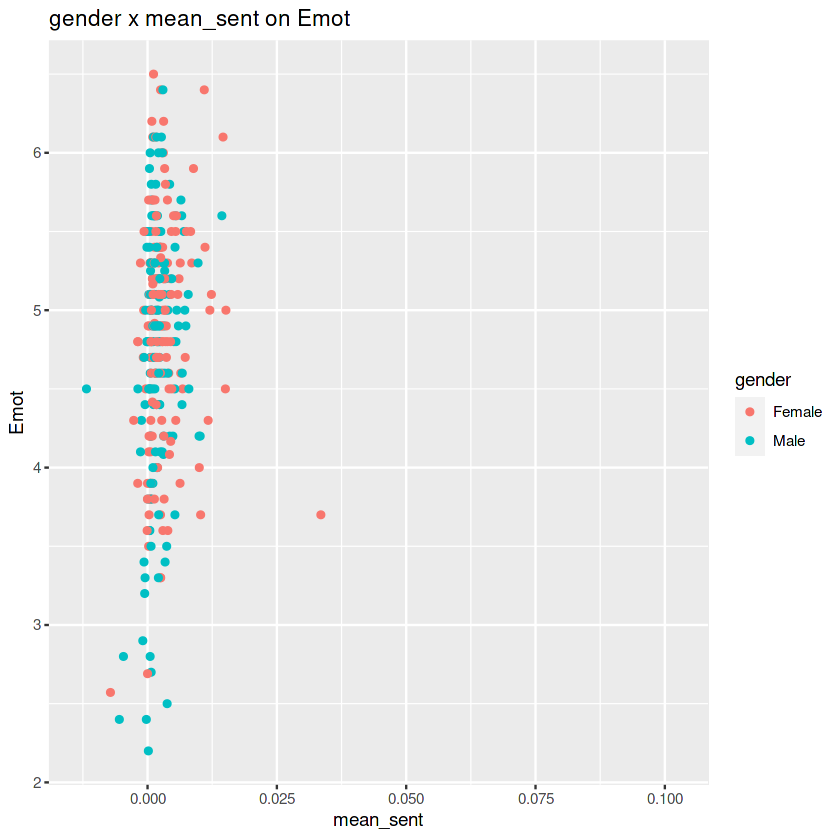

Warning message:
“Removed 80 rows containing missing values (geom_point).”


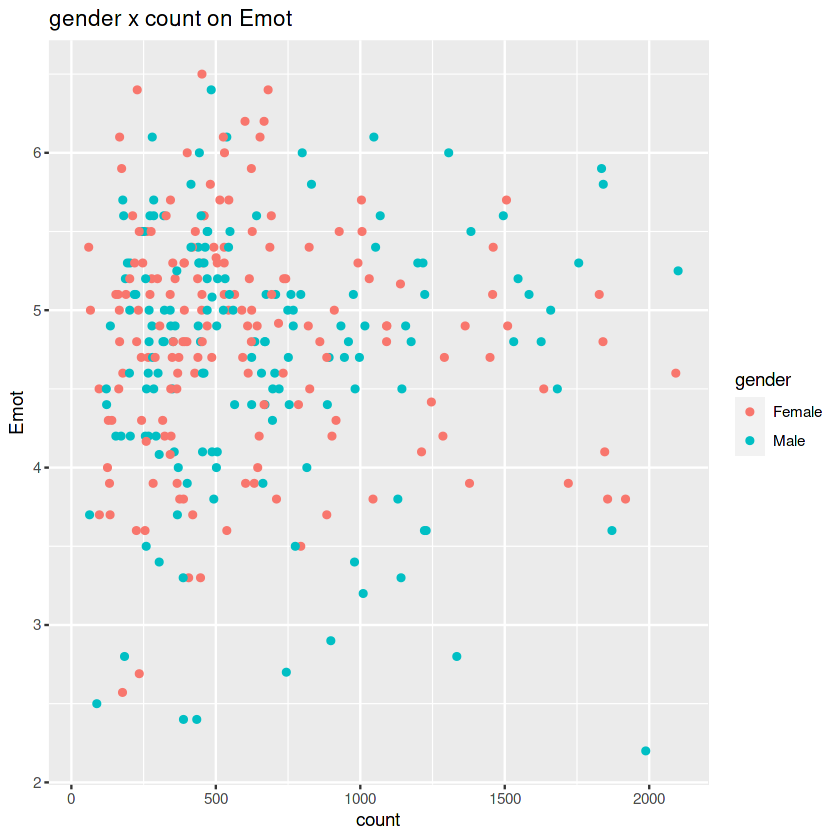

Warning message:
“Removed 80 rows containing missing values (geom_point).”


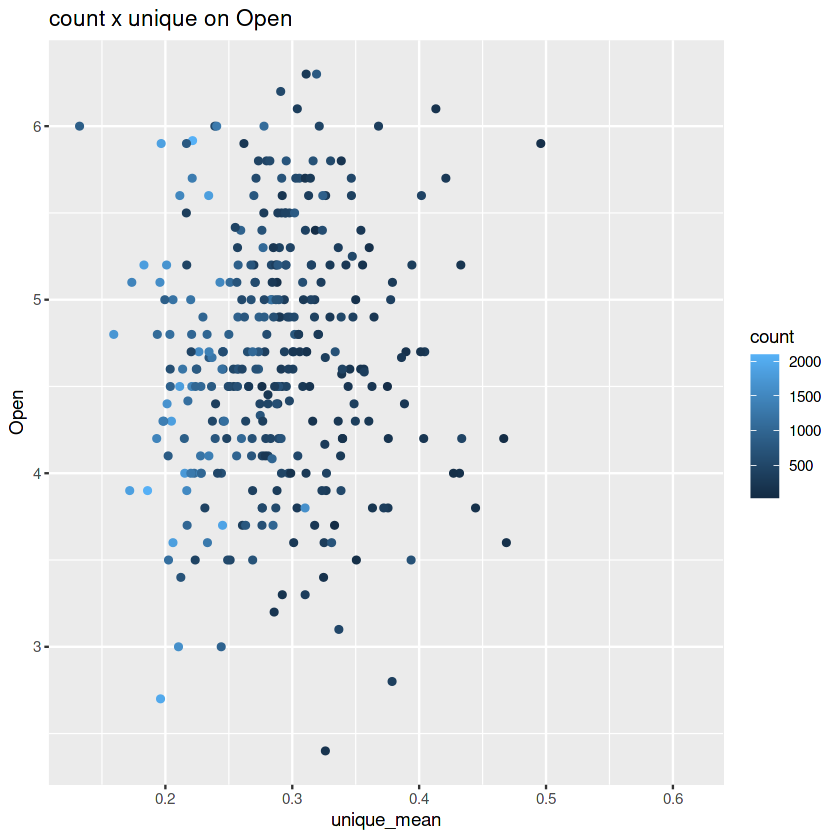

Warning message:
“Removed 80 rows containing missing values (geom_point).”


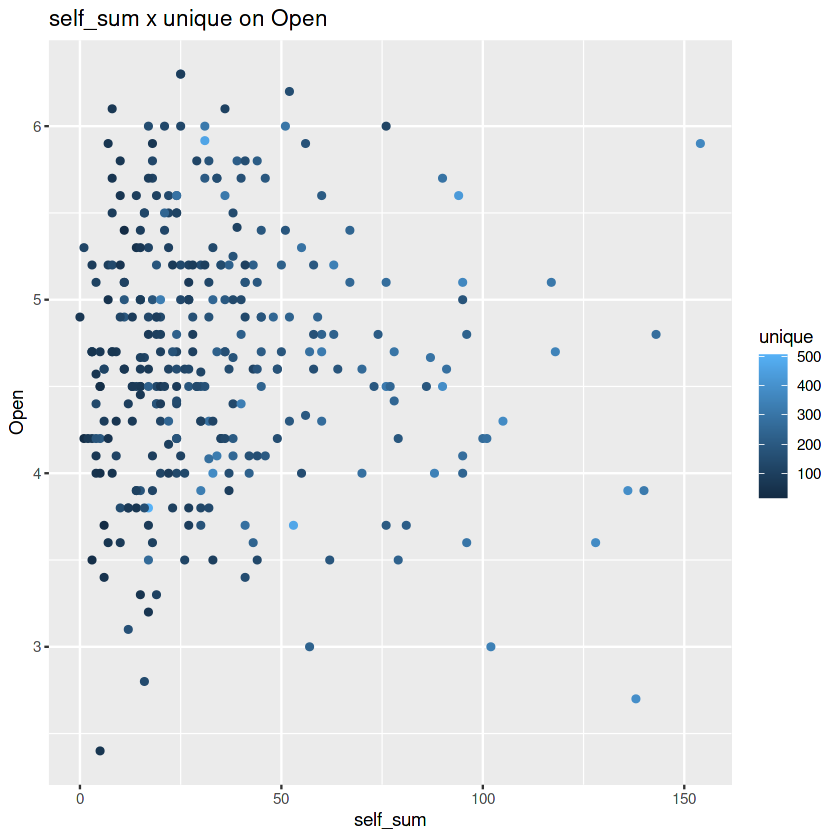

Warning message:
“Removed 80 rows containing missing values (geom_point).”


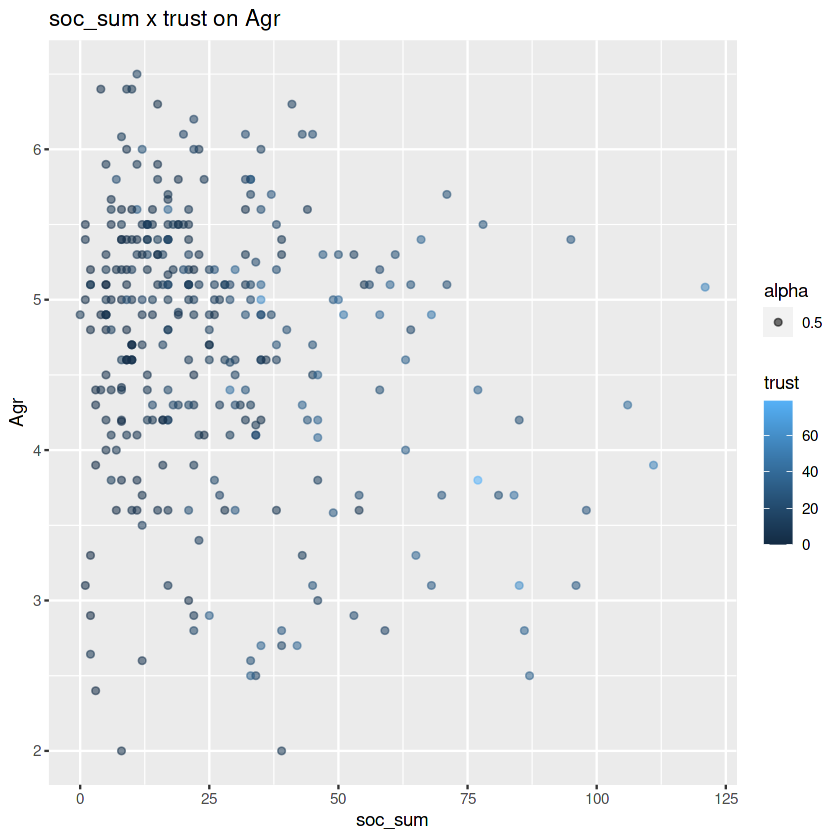

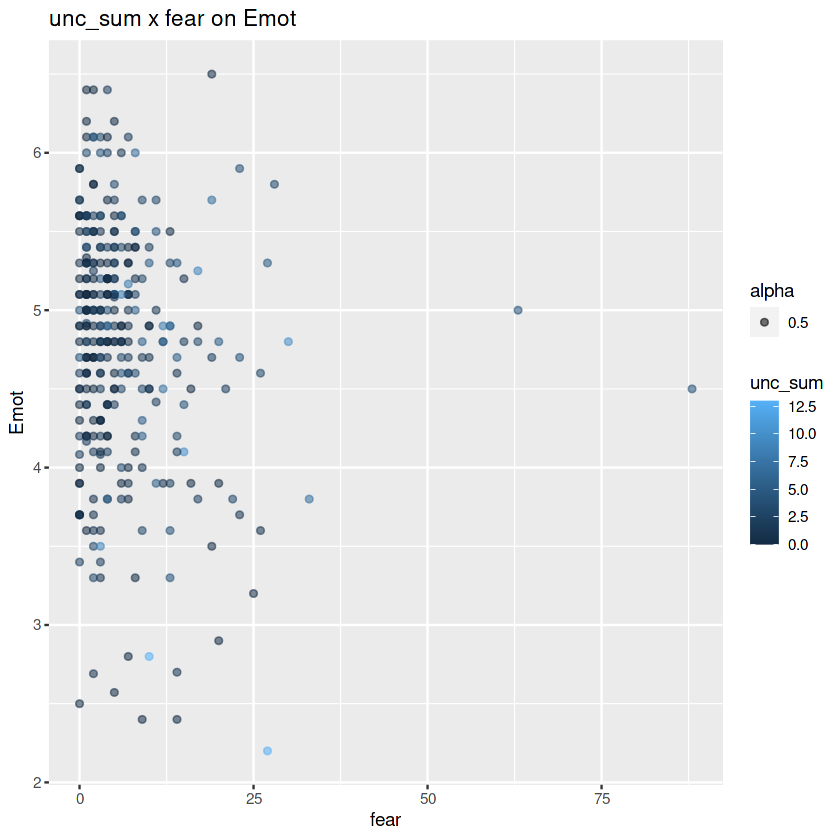

In [26]:
library(gapminder)
# gender x true_sent
ggplot(data = features_df, mapping = aes(x = mean_sent, y = Emot)) +
geom_point(mapping = aes(col=gender))+
ggtitle("gender x mean_sent on Emot")

# gender x count
ggplot(data = features_df, mapping = aes(x = count, y = Emot)) +
geom_point(mapping = aes(col = gender))+
ggtitle("gender x count on Emot")

# count x unique
ggplot(data = features_df, mapping = aes(x = unique_mean, y = Open)) +
geom_point(mapping = aes(col = count))+
ggtitle("count x unique on Open")

# self_sum x unique
ggplot(data = features_df, mapping = aes(x = self_sum, y = Open)) +
geom_point(mapping = aes(col = unique))+
ggtitle("self_sum x unique on Open")

# soc_sum x trust
ggplot(data = features_df, mapping = aes(x = soc_sum, y = Agr)) +
geom_point(mapping = aes(col = trust, alpha = 0.5))+
ggtitle("soc_sum x trust on Agr")

# unc_sum x fear
ggplot(data = features_df, mapping = aes(x = fear, y = Emot)) +
geom_point(mapping = aes(col = unc_sum, alpha = 0.5))+
ggtitle("unc_sum x fear on Emot")

Based on the plots a interaction effect was tested between `soc_sum` & `trust` as well as `count` and `uniqueness` but these two additions didn't yield a better model

# 3. Predictive model

Next you fit your predictive model(s). For instance, a linear regression model that only uses `gender` a feature might be:

In [27]:
# YOUR CODE to fit your predictive model

fit_mlm <- lm(cbind(Extr, Agr, Cons, Emot, Open) ~ anger_mean + disg_mean + 
              fear_mean + joy_mean + neg_mean + pos_mean + sad_mean + surprise + trust_mean + 
              + sent +  emp + dis + unique_mean + self_mean + soc_mean + unc_mean + 
              mean.pitch + sd.pitch + time.speaking + sd.d.energy +
              mean.conf.pitch + sd.pitch + prof_mean + hogv.entropy + hogv.cogR + 
              voice.rate + hogv.median + count, data = features_df)
summary(fit_mlm)




#

Response Extr :

Call:
lm(formula = Extr ~ anger_mean + disg_mean + fear_mean + joy_mean + 
    neg_mean + pos_mean + sad_mean + surprise + trust_mean + 
    +sent + emp + dis + unique_mean + self_mean + soc_mean + 
    unc_mean + mean.pitch + sd.pitch + time.speaking + sd.d.energy + 
    mean.conf.pitch + sd.pitch + prof_mean + hogv.entropy + hogv.cogR + 
    voice.rate + hogv.median + count, data = features_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.33136 -0.57778  0.01252  0.57189  1.77400 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -3.786e+00  2.194e+00  -1.725 0.085522 .  
anger_mean       2.772e+01  1.175e+01   2.359 0.018997 *  
disg_mean       -7.307e+00  1.159e+01  -0.630 0.529022    
fear_mean       -6.387e+00  8.721e+00  -0.732 0.464556    
joy_mean         4.700e+00  7.835e+00   0.600 0.549091    
neg_mean         1.087e+00  8.191e+00   0.133 0.894514    
pos_mean         5.000e+00  5.844e+00   0.856 0.392

# 4. Making predictions on the test set

For the competition we have to make **predictions** for the data in the **test set**

- The predictions will be evaluated by computing the **Root Means Square Error**:
    - $\displaystyle{RMSE =\sqrt{{1 \over 5n} \sum_{k \in \{cEXT, \ldots, cOPN\}} \sum_{i=1}^n (y_{ik} - \hat y_{ik})^2}}$
    - Here 
        - $y_{ik}$ is the observed value for vlogger $i$ 
        - $\hat y_{ik}$ is your prediction for vlogger $i$
        
        
You will have to take the following steps:

1. Extract the test set from the `vlogger_df`
2. Compute predictions for the test set using your model
3. Write those predictions to file in the right format

The following gives code for these steps in order.

## 4.1 The test set

The test set are those `vlogId` that are missing in the personality scores data frame `pers`. They are the rows in `vlogger_df` for which the personality scores are missing:

In [28]:
testset_vloggers = features_df %>% 
    filter(is.na(Extr))

head(testset_vloggers)

,vlogId,gender,Extr,Agr,Cons,Emot,Open,count,sent,mean_sent,⋯,emp_mean,disg_mean,anger_mean,fear_mean,joy_mean,neg_mean,pos_mean,sad_mean,trust_mean,unique_mean
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,VLOG8,Female,NA,NA,NA,NA,NA,331,1.1666667,0.0035246727,⋯,0.009544136,0.006042296,0.009063444,0.018126888,0.021148036,0.015105740,0.036253776,0.012084592,0.027190332,0.3202417
2,VLOG15,Male,NA,NA,NA,NA,NA,848,0.5714286,0.0006738544,⋯,0.003570566,0.003537736,0.009433962,0.011792453,0.016509434,0.016509434,0.035377358,0.005896226,0.042452830,0.2865566
3,VLOG18,Male,NA,NA,NA,NA,NA,327,1.1538462,0.0035285815,⋯,0.010178739,0.003058104,0.006116208,0.006116208,0.015290520,0.006116208,0.030581040,0.003058104,0.015290520,0.3608563
4,VLOG22,Female,NA,NA,NA,NA,NA,26,2.6666667,0.1025641026,⋯,0.133845059,0.038461538,0.000000000,0.000000000,0.038461538,0.000000000,0.038461538,0.000000000,0.038461538,0.6153846
5,VLOG28,Male,NA,NA,NA,NA,NA,267,-0.6666667,-0.0024968789,⋯,0.011571374,0.003745318,0.003745318,0.018726592,0.003745318,0.018726592,0.007490637,0.018726592,0.007490637,0.2996255
6,VLOG29,Female,NA,NA,NA,NA,NA,483,1.1250000,0.0023291925,⋯,0.006679115,0.006211180,0.008281573,0.002070393,0.031055901,0.014492754,0.049689441,0.002070393,0.035196687,0.3291925


## 4.2 Predictions

Continuing the example `fit_mlm` model above, for almost all models we will encounter use the `predict()` function.

- `predict()` function exists for most model fit function like `lm`, `glm`, etc., that we encounter
    - first argument should be a model object (`fit_mlm` in the example)
    - second argument should be a data frame with the test set
    - optionnaly, a third argument specifies type of response:
      - for `lm` object only `type = "resp"`
      - for `glm` object `type = "pred"` (linear predictor) or `type = "resp"` ('response' &rarr; probabilities)

For example:

In [29]:
pred_mlm = predict(fit_mlm, new = testset_vloggers)

# Always check the output
head(pred_mlm)

,Extr,Agr,Cons,Emot,Open
1,4.909989,5.136551,4.458331,4.963068,5.105344
2,3.955696,4.158655,4.528851,4.461626,4.094392
3,5.582504,5.107273,5.031487,5.184318,5.402108
4,4.814322,5.394691,3.901436,5.159446,4.803018
5,2.829970,4.711406,4.505752,4.393529,4.175517
6,4.708489,4.725252,4.563555,4.811921,4.512074


In [30]:
# compute output data frame
testset_pred = testset_vloggers %>% 
    mutate(
        Extr = pred_mlm[,'Extr'], 
        Agr  = pred_mlm[,'Agr' ],
        Cons = pred_mlm[,'Cons'],
        Emot = pred_mlm[,'Emot'],
        Open = pred_mlm[,'Open']
    ) %>%
    select(vlogId, Extr:Open)

head(testset_pred)

,vlogId,Extr,Agr,Cons,Emot,Open
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,VLOG8,4.909989,5.136551,4.458331,4.963068,5.105344
2,VLOG15,3.955696,4.158655,4.528851,4.461626,4.094392
3,VLOG18,5.582504,5.107273,5.031487,5.184318,5.402108
4,VLOG22,4.814322,5.394691,3.901436,5.159446,4.803018
5,VLOG28,2.829970,4.711406,4.505752,4.393529,4.175517
6,VLOG29,4.708489,4.725252,4.563555,4.811921,4.512074


## 4.3 Writing predictions to file

You need to upload your predictions in .csv file. However, there are multiple columns: `Extr`, `Agr`, `Cons`, `Emot`, `Open`, while Kaggle expects **long format**!

What does long format look like?

- Every prediction on a single line.
- Columns `vlogId` and `pers_axis` to map prediction *vlogger ID* and *personality axis*.

To achieve this, first `gather` the column values into a single `value` column, adding a `pers_axis` to indicate the column name:

In [31]:
testset_pred_long  <- 
  testset_pred %>% 
  gather(pers_axis, value, -vlogId) %>%
  arrange(vlogId, pers_axis)

head(testset_pred_long)

,vlogId,pers_axis,value
,<chr>,<chr>,<dbl>
1,VLOG100,Agr,5.398037
2,VLOG100,Cons,4.793272
3,VLOG100,Emot,4.994915
4,VLOG100,Extr,3.901975
5,VLOG100,Open,4.827269
6,VLOG113,Agr,5.024762


According to the competition's [Evaluation instructions](https://www.kaggle.com/c/bda2019big5/overview/evaluation), Kaggle expects file with two colums: `Id` and `value`.
  
The [Evaluation instructions](https://www.kaggle.com/c/bda2019big5/overview/evaluation) specifies we need to encode the `Agr` prediction for `VLOG8` as `VLOG8_Agr` in the `Id` column. To achieve this use `unite()` function of `dplyr`.

`unite()` take:

- a data frame as its first argument (implicitely passed by the piping operator `%>%`)
- the name of new column as its second argument (`Id` below)
- all extra arguments (`vlogId` and `pers_axis` below) are concatenated with an underscore in between

Then write the resulting data frame to a .csv file.

In [32]:
# Obtain the right format for Kaggle
testset_pred_final <- 
  testset_pred_long %>%
  unite(Id, vlogId, pers_axis) 

# Check if we succeeded
colnames(testset_pred_final)[2] <- "Expected"
head(testset_pred_final)
# Write to csv
testset_pred_final %>%
  write_csv(file = "predictions.csv")

testset_pred_final %>%
  write_csv(file = "submission.csv")#when trying to submit it said couldn't find the submission i'm assuming thats the predictions
# Check if the file was written successfully.
list.files()

,Id,Expected
,<chr>,<dbl>
1,VLOG100_Agr,5.398037
2,VLOG100_Cons,4.793272
3,VLOG100_Emot,4.994915
4,VLOG100_Extr,3.901975
5,VLOG100_Open,4.827269
6,VLOG113_Agr,5.024762


[1] "__notebook__.ipynb" "nrc.txt"            "predictions.csv"   
 [4] "Rplot001.png"       "Rplot002.png"       "Rplot003.png"      
 [7] "Rplot004.png"       "Rplot005.png"       "Rplot006.png"      
[10] "submission.csv"

Once you have clicked the <span style="background-color:#000000;color:white;padding:3px;border-radius:10px;padding-left:6px;padding-right:6px;">⟳ Save Version&nbsp;&nbsp;|&nbsp;&nbsp;0</span> button at the top left, and select the "Save & Run All (Commit)" option, go to the Viewer. There you will find your "predictions.csv" under Output. You'll also see a button there that allows you to submit your predictions with one click.

# Division of Labor

Jingli: NRC analysis, readying the first datasets, testing for interaction effects, feature selection \
Lucy: self-reference + social + uncertainty frequency, empathy and distress lexicons, lexical sophistication, word count \
Mike: AFINN, feature selection, model comparison, audio_visual files extraction, 'borrowing' profanity